<a href="https://colab.research.google.com/github/JakubJU/1/blob/main/projekt_ubrania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
#Machine learning Libaries
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
#Visualising
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
#Data manipulation
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive  
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
dataTrain = pd.read_csv('/content/gdrive/My Drive/fashion-mnist_train.csv')
dataVal = pd.read_csv('/content/gdrive/My Drive/fashion-mnist_test.csv')

xTrain, yTrain = dataTrain.drop('label', 1)/255, dataTrain['label']
xVal, yVal  = dataVal.drop('label', 1)/255, dataVal['label']

In [4]:
#Reshaping
xTrain = tf.reshape(xTrain, [60000, 28, 28, 1])
xVal = tf.reshape(xVal, [10000, 28, 28, 1])

In [5]:
xTrain

<tf.Tensor: shape=(60000, 28, 28, 1), dtype=float64, numpy=
array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],




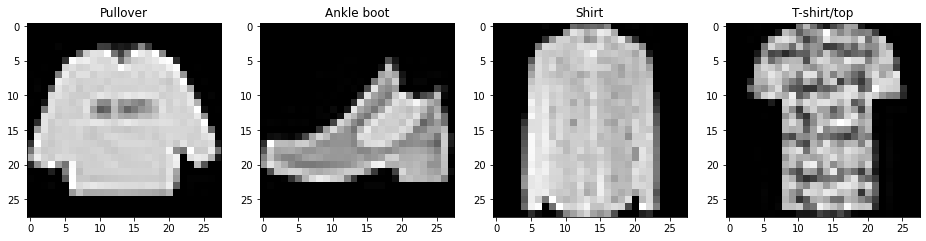

In [6]:
classNames = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal",
              "Shirt","Sneaker","Bag","Ankle boot"]

numOfImgs = 4
fig, axs = plt.subplots(nrows=1, ncols=numOfImgs, figsize=(16, 8))

for i in range(numOfImgs):
    axs[i].imshow(tf.reshape(xTrain[i], [28, 28])*255,vmin=0, vmax=255,cmap='gray')
    axs[i].title.set_text(str(classNames[yTrain[i]]))

In [9]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64,7,activation="relu",padding="same",input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128,5,activation="relu",padding="same"),
    keras.layers.Conv2D(128,3,activation="relu",padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256,3,activation="relu",padding="same"),
    keras.layers.Conv2D(256,3,activation="relu",padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation="softmax")    
])
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [14]:
checkpoint = keras.callbacks.ModelCheckpoint("fashion_CNN.h5",save_best_only=True)
history = model.fit(xTrain,yTrain,epochs=50,validation_data=(xVal,yVal), callbacks=[checkpoint], verbose=2)


Epoch 1/50
1875/1875 - 11s - loss: 0.2496 - accuracy: 0.9135 - val_loss: 0.2421 - val_accuracy: 0.9119
Epoch 2/50
1875/1875 - 11s - loss: 0.2406 - accuracy: 0.9161 - val_loss: 0.2432 - val_accuracy: 0.9112
Epoch 3/50
1875/1875 - 11s - loss: 0.2378 - accuracy: 0.9172 - val_loss: 0.2428 - val_accuracy: 0.9126
Epoch 4/50
1875/1875 - 11s - loss: 0.2284 - accuracy: 0.9195 - val_loss: 0.2389 - val_accuracy: 0.9172
Epoch 5/50
1875/1875 - 11s - loss: 0.2256 - accuracy: 0.9200 - val_loss: 0.2464 - val_accuracy: 0.9127
Epoch 6/50
1875/1875 - 11s - loss: 0.2186 - accuracy: 0.9229 - val_loss: 0.2578 - val_accuracy: 0.9147
Epoch 7/50
1875/1875 - 11s - loss: 0.2132 - accuracy: 0.9265 - val_loss: 0.2386 - val_accuracy: 0.9131
Epoch 8/50
1875/1875 - 11s - loss: 0.2080 - accuracy: 0.9257 - val_loss: 0.2392 - val_accuracy: 0.9155
Epoch 9/50
1875/1875 - 11s - loss: 0.2013 - accuracy: 0.9284 - val_loss: 0.2508 - val_accuracy: 0.9158
Epoch 10/50
1875/1875 - 11s - loss: 0.1947 - accuracy: 0.9306 - val_loss:

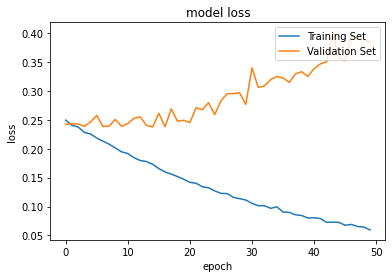

In [15]:
#Visualise training process
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Set', 'Validation Set'], loc='upper right')
plt.show()

In [16]:
predictions = model.predict(xVal)
print(predictions[0].round(0))

maxPrediction = []
for i in range(predictions.shape[0]):
    maxPrediction.append(np.argmax(predictions[i]))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
y_true = yVal
y_pred = maxPrediction
confusion_matrix(y_true, y_pred)

array([[877,   0,  12,  26,   0,   1,  80,   0,   4,   0],
       [  2, 988,   1,   7,   0,   0,   2,   0,   0,   0],
       [  8,   0, 872,   6,  48,   0,  65,   0,   1,   0],
       [ 12,   6,   5, 933,  30,   0,  13,   0,   0,   1],
       [  1,   0,  35,  26, 891,   0,  46,   0,   1,   0],
       [  0,   0,   1,   0,   0, 977,   0,  18,   0,   4],
       [ 99,   0,  35,  35,  48,   0, 779,   0,   4,   0],
       [  0,   0,   0,   0,   0,   2,   0, 977,   0,  21],
       [  3,   1,   1,   0,   3,   1,   4,   3, 983,   1],
       [  0,   0,   0,   0,   0,   3,   0,  30,   1, 966]])

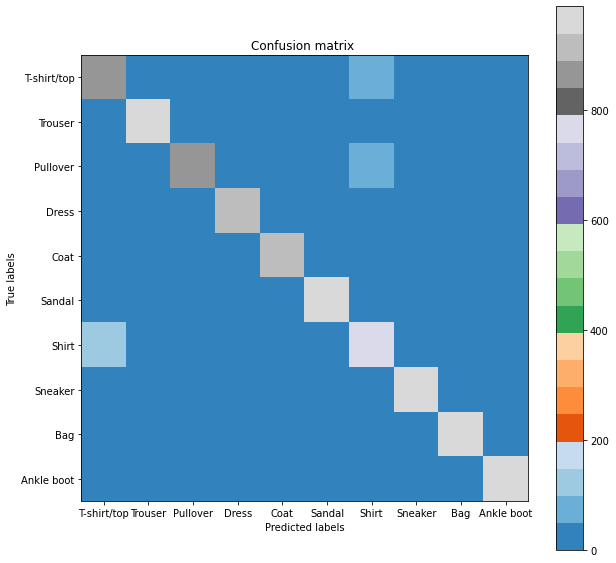

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(confusion_matrix(y_true, y_pred), cmap='tab20c')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([0,1,2,3,4,5,6,7,8,9], classNames)
plt.yticks([0,1,2,3,4,5,6,7,8,9], classNames)
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()
#https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py
